In [1]:
import pandas as pd
import compare_outcomes as co
from plotnine import *

In [2]:
actual_2024 = co.prep_bts('2024-01-28', '2024-01-28', '../db/truth/T_ONTIME_REPORTING_2024.csv')
actual_2024.reset_index(names='id', inplace=True)

/home/michael/code/recovair-abm/validation/compare_outcomes.py:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [10]:
def prep_intro_comp(actual: pd.DataFrame, csv_location: str):
    sim = pd.read_csv(csv_location)
    sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
    sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
    sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
    sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
    comp = co.OutcomeComparison(actual, sim)
    print(f'-- intro to {csv_location} --')
    print('otp', comp.compare_otp())
    print('delay', comp.compare_total_delay())
    print('cancel', comp.compare_num_cancellations())
    print('flight hours', comp.compare_total_hours_flown())
    return comp

In [6]:
comp2024 = prep_intro_comp(actual_2024, '../results-2024-01-28-flights.csv')
comp2024_nodisrupt = prep_intro_comp(actual_2024, '../results-2024-01-28-nodisrupt-flights.csv')
comp2024_dfs = prep_intro_comp(actual_2024, '../results-2024-01-28-aircraftdfs-flights.csv')
comp2024_dfs_nodisrupt = prep_intro_comp(actual_2024, '../results-2024-01-28-nodisrupt-aircraftdfs-flights.csv')

comp2024_bumpup = prep_intro_comp(actual_2024, '../results-2024-01-28-bumpup-flights.csv')
comp2024_dfs_bumpup = prep_intro_comp(actual_2024, '../results-2024-01-28-aircraftdfs-bumpup-flights.csv')

-- intro to ../results-2024-01-28-flights.csv --
otp {'actual': 0.8657701091093631, 'sim': 0.30499873128647553}
delay {'actual': 21528.0, 'sim': 192821.0}
cancel {'actual': 0.0, 'sim': 430}
flight hours {'actual': 8028.033333333334, 'sim': 7733.883333333333}
-- intro to ../results-2024-01-28-nodisrupt-flights.csv --
otp {'actual': 0.8657701091093631, 'sim': 0.9855366658208576}
delay {'actual': 21528.0, 'sim': 2630.0}
cancel {'actual': 0.0, 'sim': 3}
flight hours {'actual': 8028.033333333334, 'sim': 8559.833333333334}
-- intro to ../results-2024-01-28-aircraftdfs-flights.csv --
otp {'actual': 0.8657701091093631, 'sim': 0.31692463841664553}
delay {'actual': 21528.0, 'sim': 200541.0}
cancel {'actual': 0.0, 'sim': 545}
flight hours {'actual': 8028.033333333334, 'sim': 7486.75}
-- intro to ../results-2024-01-28-nodisrupt-aircraftdfs-flights.csv --
otp {'actual': 0.8657701091093631, 'sim': 0.9774168992641462}
delay {'actual': 21528.0, 'sim': 3775.0}
cancel {'actual': 0.0, 'sim': 28}
flight h

/tmp/ipykernel_121988/596192501.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [2]:
actual_2022 = co.prep_bts('2022-12-22', '2022-12-22', '../db/truth/T_ONTIME_REPORTING_2022.csv')
actual_2022.reset_index(names='id', inplace=True)

/home/michael/code/recovair-abm/validation/compare_outcomes.py:16: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
/home/michael/code/recovair-abm/validation/compare_outcomes.py:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [11]:
comp2022 = prep_intro_comp(actual_2022, '../results-2022-12-22-flights.csv')
comp2022_nodisrupt = prep_intro_comp(actual_2022, '../results-2022-12-22-nodisrupt-flights.csv')
comp2022_dfs = prep_intro_comp(actual_2022, '../results-2022-12-22-aircraftdfs-flights.csv')
comp2022_dfs_nodisrupt = prep_intro_comp(actual_2022, '../results-2022-12-22-nodisrupt-aircraftdfs-flights.csv')

-- intro to ../results-2022-12-22-flights.csv --
otp {'actual': 0.28586013272077593, 'sim': 0.1610515569167943}
delay {'actual': 154511.0, 'sim': 295387.0}
cancel {'actual': 1026.0, 'sim': 1257}
flight hours {'actual': 5942.416666666667, 'sim': 5727.083333333333}
-- intro to ../results-2022-12-22-nodisrupt-flights.csv --
otp {'actual': 0.28586013272077593, 'sim': 0.9338948443083206}
delay {'actual': 154511.0, 'sim': 16120.0}
cancel {'actual': 1026.0, 'sim': 4}
flight hours {'actual': 5942.416666666667, 'sim': 8285.833333333334}
-- intro to ../results-2022-12-22-aircraftdfs-flights.csv --
otp {'actual': 0.28586013272077593, 'sim': 0.183256763654926}
delay {'actual': 154511.0, 'sim': 218547.0}
cancel {'actual': 1026.0, 'sim': 1523}
flight hours {'actual': 5942.416666666667, 'sim': 5079.85}
-- intro to ../results-2022-12-22-nodisrupt-aircraftdfs-flights.csv --
otp {'actual': 0.28586013272077593, 'sim': 0.7611026033690659}
delay {'actual': 154511.0, 'sim': 12665.0}
cancel {'actual': 1026.0

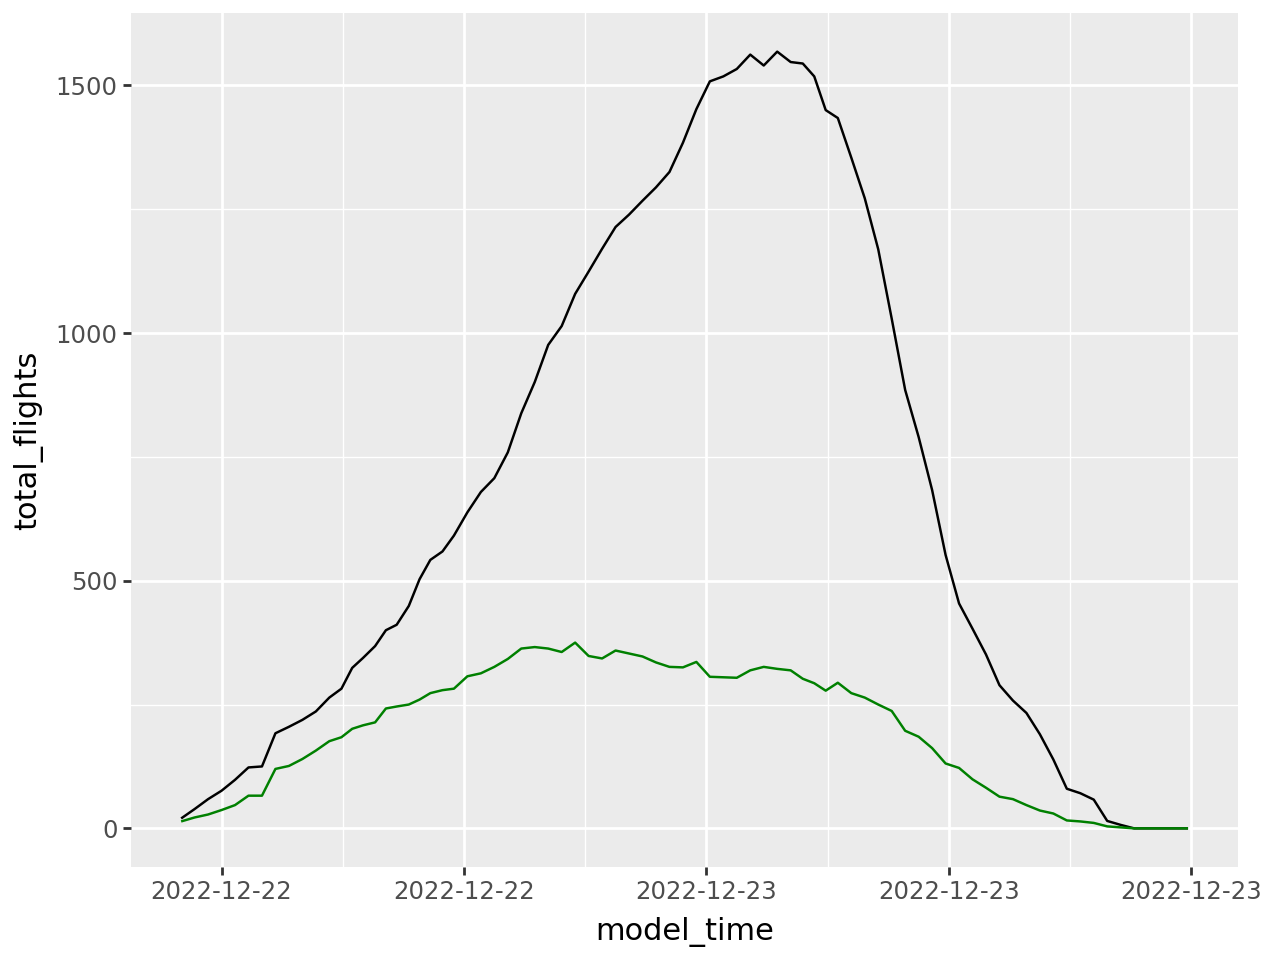

In [9]:
dfs_stats = pd.read_csv('../test_log_12-22-aircraftdfs-dfs-stats.csv')
dfs_stats['model_time'] = pd.to_datetime(dfs_stats['model_time'])
from plotnine import *
ggplot(dfs_stats) + geom_line(aes(x='model_time', y='total_flights')) + geom_line(aes(x='model_time', y='flights_reserved'), color='green')

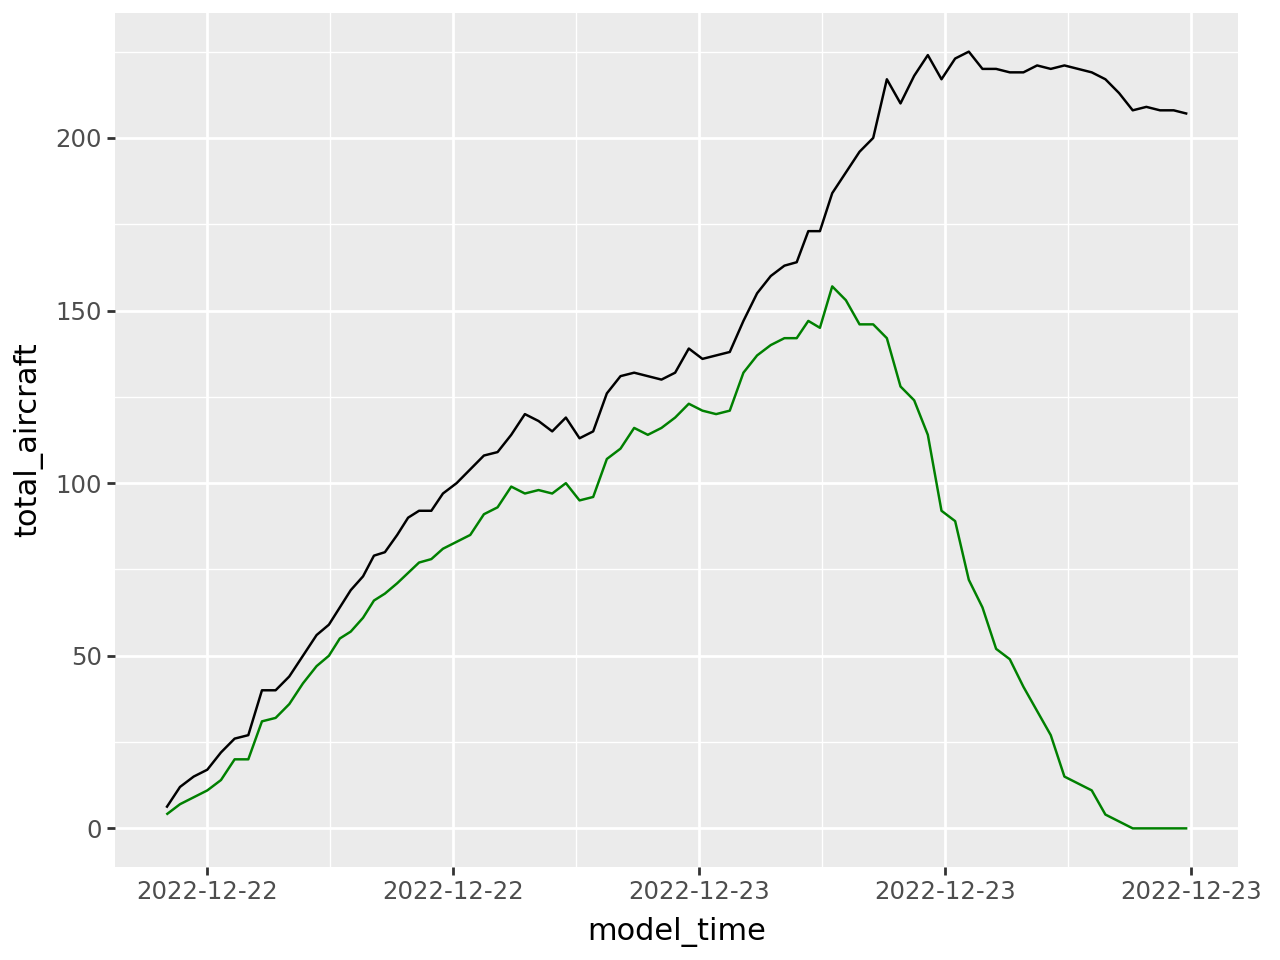

In [93]:

ggplot(dfs_stats) + geom_line(aes(x='model_time', y='total_aircraft')) + geom_line(aes(x='model_time', y='aircraft_with_string'), color='green')

In [4]:
sim.query('id == 491823').sort_values('sched_dep')

,id,flight_number,tail,crew,passengers,origin,dest,CANCELLED,dep_time,arr_time,sched_dep,sched_arr,ARR_DELAY,DEP_DELAY,duration
3892,491823,941,N428WN,677.0,143,SAV,BWI,0,2024-01-28 18:35:00+00:00,2024-01-28 20:10:00+00:00,2024-01-28 18:35:00+00:00,2024-01-28 20:10:00+00:00,0.0,0.0,0 days 01:35:00


In [66]:
sim.set_index('id').loc[[398310, 397499, 397124]]

,flight_number,tail,crew,passengers,origin,dest,CANCELLED,dep_time,arr_time,sched_dep,sched_arr,ARR_DELAY,DEP_DELAY
id,,,,,,,,,,,,,
398310,2333,N419WN,1112.0,16,BZN,LAS,0,2022-12-23 03:25:00+00:00,2022-12-23 05:25:00+00:00,2022-12-23 02:55:00+00:00,2022-12-23 04:55:00+00:00,30.0,30.0
397499,1620,N8582Z,35.0,0,LAS,SJC,1,NaT,NaT,2022-12-23 04:15:00+00:00,2022-12-23 05:40:00+00:00,NaN,NaN
397124,1773,N425LV,807.0,0,SJC,SEA,1,NaT,NaT,2022-12-23 02:05:00+00:00,2022-12-23 04:20:00+00:00,NaN,NaN


In [31]:
delay_cancel_df_data = []
for delay_tolerance in [10, 30, *range(60, 361, 60)]:
    sim = pd.read_csv(f'../results-2024-01-28_{delay_tolerance}-nodisrupt-flights.csv')
    sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
    sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
    sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
    sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
    comp_delay = co.OutcomeComparison(comp2024.actual, sim)
    print(delay_tolerance, 'otp', comp_delay.compare_otp())
    print(delay_tolerance, 'delay', comp_delay.compare_total_delay())
    print(delay_tolerance, 'cancel', comp_delay.compare_num_cancellations())
    delay_cancel_df_data.append({
        'delay_tolerance': delay_tolerance,
        'otp': comp_delay.compare_otp()['sim'],
        'delay': comp_delay.compare_total_delay()['sim'],
        'cancel': comp_delay.compare_num_cancellations()['sim']
    })
delay_cancel_df = pd.DataFrame(delay_cancel_df_data)
delay_cancel_df

# delay_cancel_df_data = []
# for delay_tolerance in [10, 30, *range(60, 361, 60)]:
#     sim = pd.read_csv(f'../results-2024-01-28-aircraftdfs_{delay_tolerance}-flights.csv')
#     sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
#     sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
#     sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
#     sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
#     comp_delay = co.OutcomeComparison(comp2024.actual, sim)
#     print(delay_tolerance, 'otp', comp_delay.compare_otp())
#     print(delay_tolerance, 'delay', comp_delay.compare_total_delay())
#     print(delay_tolerance, 'cancel', comp_delay.compare_num_cancellations())
#     delay_cancel_df_data.append({
#         'delay_tolerance': delay_tolerance,
#         'otp': comp_delay.compare_otp()['sim'],
#         'delay': comp_delay.compare_total_delay()['sim'],
#         'cancel': comp_delay.compare_num_cancellations()['sim']
#     })
# delay_cancel_dfs_df = pd.DataFrame(delay_cancel_df_data)
# delay_cancel_dfs_df

10 otp {'actual': 0.8657701091093631, 'sim': 0.987059122050241}
10 delay {'actual': 21528.0, 'sim': 355.0}
10 cancel {'actual': 0.0, 'sim': 47}
30 otp {'actual': 0.8657701091093631, 'sim': 0.9822380106571936}
30 delay {'actual': 21528.0, 'sim': 1240.0}
30 cancel {'actual': 0.0, 'sim': 22}
60 otp {'actual': 0.8657701091093631, 'sim': 0.9860441512306521}
60 delay {'actual': 21528.0, 'sim': 1300.0}
60 cancel {'actual': 0.0, 'sim': 11}
120 otp {'actual': 0.8657701091093631, 'sim': 0.987059122050241}
120 delay {'actual': 21528.0, 'sim': 2225.0}
120 cancel {'actual': 0.0, 'sim': 3}
180 otp {'actual': 0.8657701091093631, 'sim': 0.9855366658208576}
180 delay {'actual': 21528.0, 'sim': 2785.0}
180 cancel {'actual': 0.0, 'sim': 3}
240 otp {'actual': 0.8657701091093631, 'sim': 0.9862978939355493}
240 delay {'actual': 21528.0, 'sim': 2370.0}
240 cancel {'actual': 0.0, 'sim': 2}
300 otp {'actual': 0.8657701091093631, 'sim': 0.9850291804110631}
300 delay {'actual': 21528.0, 'sim': 2480.0}
300 cancel

,delay_tolerance,otp,delay,cancel
0,10,0.987059,355.0,47
1,30,0.982238,1240.0,22
2,60,0.986044,1300.0,11
3,120,0.987059,2225.0,3
4,180,0.985537,2785.0,3
5,240,0.986298,2370.0,2
6,300,0.985029,2480.0,1
7,360,0.986044,2330.0,3


In [35]:
delay_cancel_df_data = []
for delay_tolerance in [10, 30, *range(60, 361, 60)]:
    sim = pd.read_csv(f'../results-2022-12-22_{delay_tolerance}-nodisrupt-flights.csv')
    sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
    sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
    sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
    sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
    comp_delay = co.OutcomeComparison(comp2022.actual, sim)
    print(delay_tolerance, 'otp', comp_delay.compare_otp())
    print(delay_tolerance, 'delay', comp_delay.compare_total_delay())
    print(delay_tolerance, 'cancel', comp_delay.compare_num_cancellations())
    delay_cancel_df_data.append({
        'delay_tolerance': delay_tolerance,
        'otp': comp_delay.compare_otp()['sim'],
        'delay': comp_delay.compare_total_delay()['sim'],
        'cancel': comp_delay.compare_num_cancellations()['sim']
    })
delay_cancel_df = pd.DataFrame(delay_cancel_df_data)
delay_cancel_df

# delay_cancel_df_data = []
# for delay_tolerance in [10, 30, *range(60, 361, 60)]:
#     sim = pd.read_csv(f'../results-2022-12-22-aircraftdfs_{delay_tolerance}-flights.csv')
#     sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
#     sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
#     sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
#     sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
#     comp_delay = co.OutcomeComparison(comp2022.actual, sim)
#     print(delay_tolerance, 'otp', comp_delay.compare_otp())
#     print(delay_tolerance, 'delay', comp_delay.compare_total_delay())
#     print(delay_tolerance, 'cancel', comp_delay.compare_num_cancellations())
#     delay_cancel_df_data.append({
#         'delay_tolerance': delay_tolerance,
#         'otp': comp_delay.compare_otp()['sim'],
#         'delay': comp_delay.compare_total_delay()['sim'],
#         'cancel': comp_delay.compare_num_cancellations()['sim']
#     })
# delay_cancel_dfs_df = pd.DataFrame(delay_cancel_df_data)
# delay_cancel_dfs_df

10 otp {'actual': 0.28586013272077593, 'sim': 0.976773864216437}
10 delay {'actual': 154511.0, 'sim': 320.0}
10 cancel {'actual': 1026.0, 'sim': 85}
30 otp {'actual': 0.28586013272077593, 'sim': 0.9709035222052067}
30 delay {'actual': 154511.0, 'sim': 1355.0}
30 cancel {'actual': 1026.0, 'sim': 59}
60 otp {'actual': 0.28586013272077593, 'sim': 0.9635017866258295}
60 delay {'actual': 154511.0, 'sim': 3090.0}
60 cancel {'actual': 1026.0, 'sim': 52}
120 otp {'actual': 0.28586013272077593, 'sim': 0.9599285349668198}
120 delay {'actual': 154511.0, 'sim': 7220.0}
120 cancel {'actual': 1026.0, 'sim': 14}
180 otp {'actual': 0.28586013272077593, 'sim': 0.9446145992853496}
180 delay {'actual': 154511.0, 'sim': 11870.0}
180 cancel {'actual': 1026.0, 'sim': 13}
240 otp {'actual': 0.28586013272077593, 'sim': 0.9382337927514037}
240 delay {'actual': 154511.0, 'sim': 14330.0}
240 cancel {'actual': 1026.0, 'sim': 8}
300 otp {'actual': 0.28586013272077593, 'sim': 0.9344053088310362}
300 delay {'actual'

,delay_tolerance,otp,delay,cancel
0,10,0.976774,320.0,85
1,30,0.970904,1355.0,59
2,60,0.963502,3090.0,52
3,120,0.959929,7220.0,14
4,180,0.944615,11870.0,13
5,240,0.938234,14330.0,8
6,300,0.934405,15315.0,5
7,360,0.933129,16945.0,2


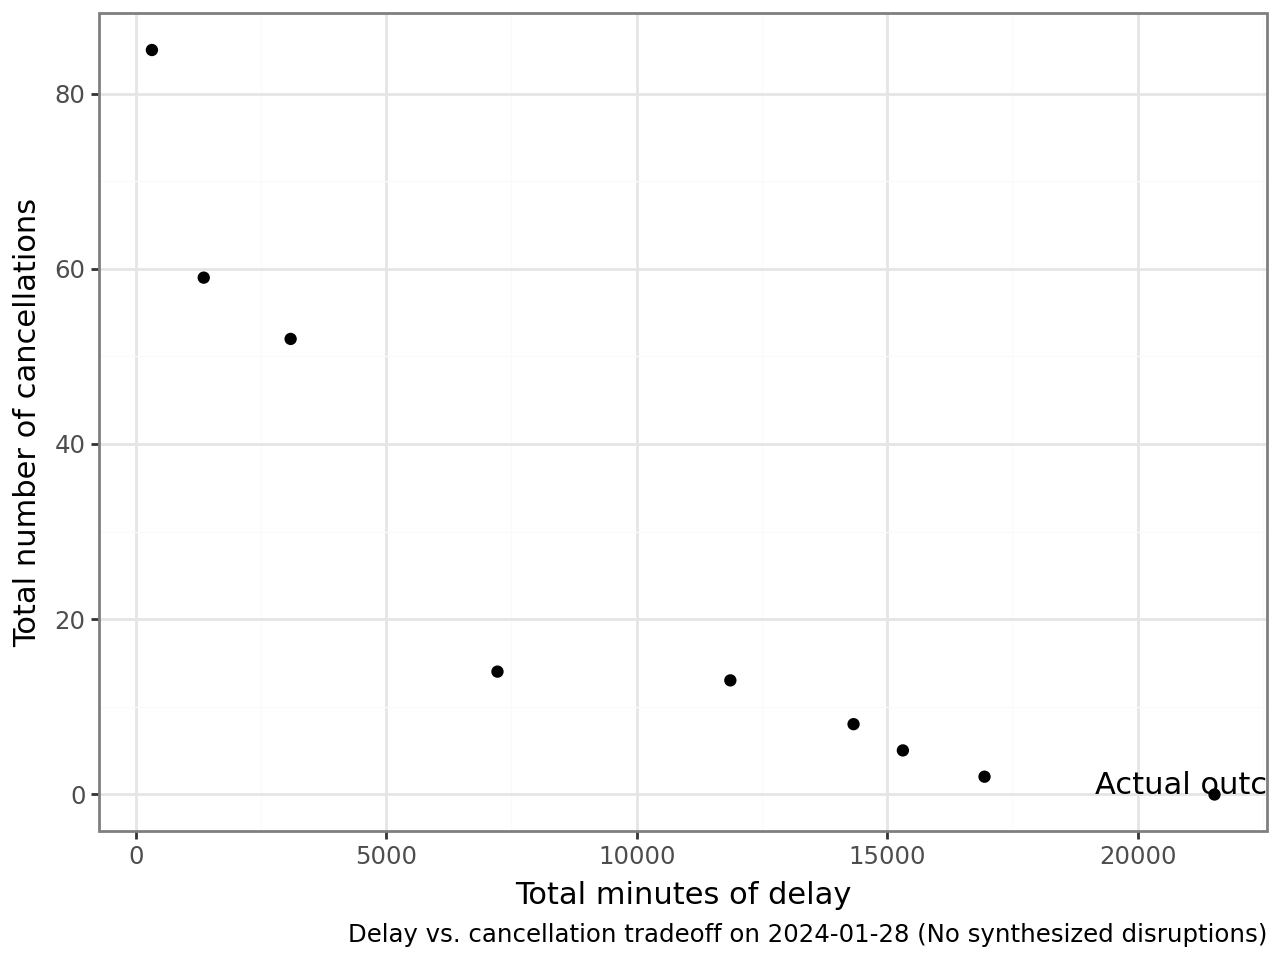

In [36]:
# + co.pn.geom_point(data=delay_cancel_dfs_df, mapping=co.pn.aes(x='delay', y='cancel'), shape='^', color='blue')\
co.pn.ggplot(delay_cancel_df)\
    + co.pn.geom_point(co.pn.aes(x='delay', y='cancel'))\
    + co.pn.annotate(geom='point', x=comp2024.compare_total_delay()['actual'], y=comp2024.compare_num_cancellations()['actual'], color='black')\
    + co.pn.annotate(geom='text', x=comp2024.compare_total_delay()['actual']+1, y=comp2024.compare_num_cancellations()['actual']+1, label='Actual outcome')\
    + co.pn.ylim(0, delay_cancel_df['cancel'].max())\
    + co.pn.labs(x='Total minutes of delay', y='Total number of cancellations', caption='Delay vs. cancellation tradeoff on 2024-01-28 (No synthesized disruptions)', colour='Max delay per flight')\
    + co.pn.theme_bw()

In [30]:
ggsave(_, f'plots/2022-tradeoff.pdf', width=4, height=3)


/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 4 x 3 in image.
/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: plots/2022-tradeoff.pdf


In [65]:
comp2024.actual.query('ORIGIN == "DAL"').sort_values('ActualDepTimeUTC').iloc[-15:]

,id,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,ActualDepHourUTC,ActualArrHourUTC,duration,arr_time,dep_time
3831,494966,2024-01-28,WN,N950WN,2100,DAL,COS,2155,2144.0,-11.0,...,2024-01-28 21:55:00-08:00,2024-01-28,21,2024-01-29 03:44:00+00:00,2024-01-29 05:34:00+00:00,3,5,0 days 01:50:00,2024-01-29 05:34:00+00:00,2024-01-29 03:44:00+00:00
1669,492804,2024-01-28,WN,N8314L,4450,DAL,LAX,2110,2145.0,35.0,...,2024-01-28 22:35:00-08:00,2024-01-28,22,2024-01-29 03:45:00+00:00,2024-01-29 07:01:00+00:00,3,7,0 days 03:16:00,2024-01-29 07:01:00+00:00,2024-01-29 03:45:00+00:00
1960,493095,2024-01-28,WN,N8551Q,2488,DAL,BHM,2155,2148.0,-7.0,...,2024-01-28 21:25:00-08:00,2024-01-28,21,2024-01-29 03:48:00+00:00,2024-01-29 05:15:00+00:00,3,5,0 days 01:27:00,2024-01-29 05:15:00+00:00,2024-01-29 03:48:00+00:00
168,491303,2024-01-28,WN,N223WN,1593,DAL,MAF,2145,2150.0,5.0,...,2024-01-28 21:00:00-08:00,2024-01-28,21,2024-01-29 03:50:00+00:00,2024-01-29 05:00:00+00:00,3,5,0 days 01:10:00,2024-01-29 05:00:00+00:00,2024-01-29 03:50:00+00:00
1207,492342,2024-01-28,WN,N7739A,2587,DAL,ABQ,2155,2155.0,0.0,...,2024-01-28 21:45:00-08:00,2024-01-28,21,2024-01-29 03:55:00+00:00,2024-01-29 05:35:00+00:00,3,5,0 days 01:40:00,2024-01-29 05:35:00+00:00,2024-01-29 03:55:00+00:00
1071,492206,2024-01-28,WN,N566WN,685,DAL,MCI,2110,2211.0,61.0,...,2024-01-28 20:35:00-08:00,2024-01-28,20,2024-01-29 04:11:00+00:00,2024-01-29 05:32:00+00:00,4,5,0 days 01:21:00,2024-01-29 05:32:00+00:00,2024-01-29 04:11:00+00:00
948,492083,2024-01-28,WN,N488WN,3903,DAL,AMA,2220,2220.0,0.0,...,2024-01-28 21:35:00-08:00,2024-01-28,21,2024-01-29 04:20:00+00:00,2024-01-29 05:24:00+00:00,4,5,0 days 01:04:00,2024-01-29 05:24:00+00:00,2024-01-29 04:20:00+00:00
2153,493288,2024-01-28,WN,N8610A,63,DAL,HOU,2220,2227.0,7.0,...,2024-01-28 21:25:00-08:00,2024-01-28,21,2024-01-29 04:27:00+00:00,2024-01-29 05:24:00+00:00,4,5,0 days 00:57:00,2024-01-29 05:24:00+00:00,2024-01-29 04:27:00+00:00
2663,493798,2024-01-28,WN,N8724J,1359,DAL,SLC,2220,2232.0,12.0,...,2024-01-28 23:10:00-08:00,2024-01-28,23,2024-01-29 04:32:00+00:00,2024-01-29 07:18:00+00:00,4,7,0 days 02:46:00,2024-01-29 07:18:00+00:00,2024-01-29 04:32:00+00:00
2432,493567,2024-01-28,WN,N8668A,4255,DAL,DEN,2235,2234.0,-1.0,...,2024-01-28 22:35:00-08:00,2024-01-28,22,2024-01-29 04:34:00+00:00,2024-01-29 06:28:00+00:00,4,6,0 days 01:54:00,2024-01-29 06:28:00+00:00,2024-01-29 04:34:00+00:00


In [75]:
(comp2024_dfs.merged['tail'] == comp2024_dfs.merged['TAIL_NUM']).mean()

0.608982491753362

In [85]:
comp2024.actual.query('TAIL_NUM == "N945WN"').sort_values('ActualDepTimeUTC')

,id,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,ActualDepHourUTC,ActualArrHourUTC,duration,arr_time,dep_time
3812,494947,2024-01-28,WN,N945WN,3742,SYR,BWI,600,559.0,-1.0,...,2024-01-28 04:40:00-08:00,2024-01-28,4,2024-01-28 10:59:00+00:00,2024-01-28 12:12:00+00:00,10,12,0 days 01:13:00,2024-01-28 12:12:00+00:00,2024-01-28 10:59:00+00:00
3807,494942,2024-01-28,WN,N945WN,2229,BWI,STL,845,840.0,-5.0,...,2024-01-28 08:15:00-08:00,2024-01-28,8,2024-01-28 13:40:00+00:00,2024-01-28 15:37:00+00:00,13,15,0 days 01:57:00,2024-01-28 15:37:00+00:00,2024-01-28 13:40:00+00:00
3810,494945,2024-01-28,WN,N945WN,2229,STL,OMA,1050,1042.0,-8.0,...,2024-01-28 10:10:00-08:00,2024-01-28,10,2024-01-28 16:42:00+00:00,2024-01-28 17:53:00+00:00,16,17,0 days 01:11:00,2024-01-28 17:53:00+00:00,2024-01-28 16:42:00+00:00
3809,494944,2024-01-28,WN,N945WN,2229,OMA,DCA,1245,1239.0,-6.0,...,2024-01-28 13:05:00-08:00,2024-01-28,13,2024-01-28 18:39:00+00:00,2024-01-28 21:03:00+00:00,18,21,0 days 02:24:00,2024-01-28 21:03:00+00:00,2024-01-28 18:39:00+00:00
3808,494943,2024-01-28,WN,N945WN,2229,DCA,FLL,1640,1642.0,2.0,...,2024-01-28 16:20:00-08:00,2024-01-28,16,2024-01-28 21:42:00+00:00,2024-01-29 00:51:00+00:00,21,0,0 days 03:09:00,2024-01-29 00:51:00+00:00,2024-01-28 21:42:00+00:00
3811,494946,2024-01-28,WN,N945WN,3672,FLL,DCA,2000,2037.0,37.0,...,2024-01-28 19:30:00-08:00,2024-01-28,19,2024-01-29 01:37:00+00:00,2024-01-29 03:54:00+00:00,1,3,0 days 02:17:00,2024-01-29 03:54:00+00:00,2024-01-29 01:37:00+00:00


In [90]:
(comp2024.actual['DEP_DELAY'] < 0).mean()

0.526516112661761

In [101]:
comp2024.simulated.set_index('id').loc[[494621, 494619, 494620]]

,flight_number,tail,crew,passengers,origin,dest,CANCELLED,dep_time,arr_time,sched_dep,sched_arr,ARR_DELAY,DEP_DELAY,duration
id,,,,,,,,,,,,,,
494621,3514,N211WN,1272.0,128,BNA,BDL,0,2024-01-28 21:45:00+00:00,2024-01-29 00:00:00+00:00,2024-01-28 18:55:00+00:00,2024-01-28 21:10:00+00:00,170.0,170.0,0 days 02:15:00
494619,2192,N220WN,1065.0,81,BDL,BWI,0,2024-01-29 00:00:00+00:00,2024-01-29 01:20:00+00:00,2024-01-28 22:00:00+00:00,2024-01-28 23:20:00+00:00,120.0,120.0,0 days 01:20:00
494620,3389,N442WN,1067.0,0,BWI,SRQ,1,NaT,NaT,2024-01-29 00:25:00+00:00,2024-01-29 02:55:00+00:00,NaN,NaN,NaT


In [11]:
comp2024_dfs.actual.query('TAIL_NUM == "N7715E"').sort_values('DEP_TIME')

,id,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,ActualDepHourUTC,ActualArrHourUTC,duration
1124,492259,2024-01-28,WN,N7715E,1764,DEN,PHX,1230,1231.0,1.0,...,2024-01-28,21,2024-01-28 13:30:00-08:00,2024-01-28,13,2024-01-28 19:31:00+00:00,2024-01-28 21:18:00+00:00,19,21,0 days 01:47:00
1126,492261,2024-01-28,WN,N7715E,2683,PHX,BUF,1100,1518.0,258.0,...,2024-01-28,22,2024-01-28 14:00:00-08:00,2024-01-28,14,2024-01-28 22:18:00+00:00,2024-01-29 02:23:00+00:00,22,2,0 days 04:05:00
1125,492260,2024-01-28,WN,N7715E,2683,BUF,FLL,1735,2157.0,262.0,...,2024-01-29,1,2024-01-28 17:40:00-08:00,2024-01-28,17,2024-01-29 02:57:00+00:00,2024-01-29 05:54:00+00:00,2,5,0 days 02:57:00


In [27]:
comp2022.actual.groupby('TAIL_NUM').agg({'CANCELLED': ['min', 'sum', 'count']})[('CANCELLED', 'min')]

TAIL_NUM
N1801U    0.0
N1802U    0.0
N1803U    0.0
N1804U    0.0
N1805U    0.0
         ... 
N965WN    0.0
N966WN    0.0
N967WN    0.0
N968WN    0.0
N969WN    0.0
Name: (CANCELLED, min), Length: 769, dtype: float64

In [13]:
comp2024_dfs_nodisrupt.simulated.query('tail == "N7715E"').sort_values('sched_dep')

,id,flight_number,tail,crew,passengers,origin,dest,CANCELLED,dep_time,arr_time,sched_dep,sched_arr,ARR_DELAY,DEP_DELAY,duration
3603,492261,2683,N7715E,1280.0,20,PHX,BUF,0,2024-01-28 18:00:00+00:00,2024-01-28 22:00:00+00:00,2024-01-28 18:00:00+00:00,2024-01-28 22:00:00+00:00,0.0,0.0,0 days 04:00:00
1606,492259,1764,N7715E,NaN,0,DEN,PHX,1,NaT,NaT,2024-01-28 19:30:00+00:00,2024-01-28 21:30:00+00:00,NaN,NaN,NaT
2529,492260,2683,N7715E,1096.0,0,BUF,FLL,0,2024-01-28 22:35:00+00:00,2024-01-29 01:40:00+00:00,2024-01-28 22:35:00+00:00,2024-01-29 01:40:00+00:00,0.0,0.0,0 days 03:05:00


In [82]:
comp2024_dfs.actual.query('id == 491694')[['ActualDepTimeUTC', 'ActualArrTimeUTC', 'DEP_DELAY', 'TAIL_NUM']]

,ActualDepTimeUTC,ActualArrTimeUTC,DEP_DELAY,TAIL_NUM
559,2024-01-28 10:56:00+00:00,2024-01-28 13:10:00+00:00,1.0,N405WN


<Axes: ylabel='Frequency'>

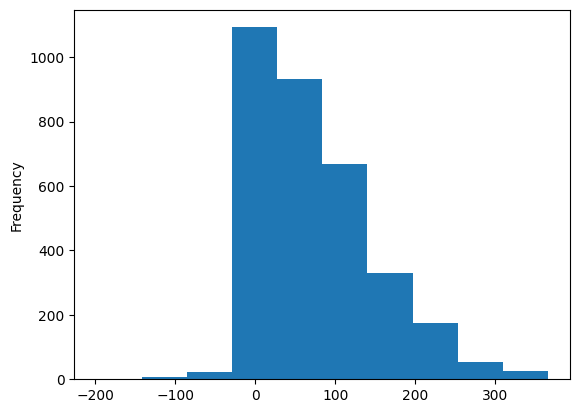

In [88]:
(comp2024_dfs.merged['DEP_DELAY_sim'] - comp2024_dfs.merged['DEP_DELAY_act']).plot.hist()

In [71]:
comp2024.actual.query('TAIL_NUM == "N909WN"').sort_values('ActualDepTimeUTC')

,id,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,ActualDepHourUTC,ActualArrHourUTC,duration
3638,494773,2024-01-28,WN,N909WN,210,RIC,ATL,605,556.0,-9.0,...,2024-01-28,13,2024-01-28 05:05:00-08:00,2024-01-28,5,2024-01-28 10:56:00+00:00,2024-01-28 12:38:00+00:00,10,12,0 days 01:42:00
3637,494772,2024-01-28,WN,N909WN,210,ATL,OMA,850,909.0,19.0,...,2024-01-28,16,2024-01-28 08:20:00-08:00,2024-01-28,8,2024-01-28 14:09:00+00:00,2024-01-28 16:26:00+00:00,14,16,0 days 02:17:00
3633,494768,2024-01-28,WN,N909WN,1242,OMA,MDW,1055,1101.0,6.0,...,2024-01-28,18,2024-01-28 10:20:00-08:00,2024-01-28,10,2024-01-28 17:01:00+00:00,2024-01-28 18:24:00+00:00,17,18,0 days 01:23:00
3634,494769,2024-01-28,WN,N909WN,1528,MDW,DEN,1315,1315.0,0.0,...,2024-01-28,22,2024-01-28 14:00:00-08:00,2024-01-28,14,2024-01-28 19:15:00+00:00,2024-01-28 21:41:00+00:00,19,21,0 days 02:26:00
3639,494774,2024-01-28,WN,N909WN,3623,DEN,MDW,1545,1550.0,5.0,...,2024-01-29,1,2024-01-28 17:00:00-08:00,2024-01-28,17,2024-01-28 22:50:00+00:00,2024-01-29 01:10:00+00:00,22,1,0 days 02:20:00
3636,494771,2024-01-28,WN,N909WN,1901,MDW,RSW,1535,2000.0,265.0,...,2024-01-29,0,2024-01-28 16:20:00-08:00,2024-01-28,16,2024-01-29 02:00:00+00:00,2024-01-29 04:40:00+00:00,2,4,0 days 02:40:00
3635,494770,2024-01-28,WN,N909WN,1666,RSW,IND,1955,16.0,261.0,...,2024-01-29,3,2024-01-28 19:25:00-08:00,2024-01-28,19,2024-01-29 05:16:00+00:00,2024-01-29 07:45:00+00:00,5,7,0 days 02:29:00


In [70]:
comp2024.simulated.query('tail == "N909WN"').sort_values('dep_time')

,id,flight_number,tail,crew,passengers,origin,dest,CANCELLED,dep_time,arr_time,sched_dep,sched_arr,ARR_DELAY,DEP_DELAY,duration
2239,494773,210,N909WN,734.0,143,RIC,ATL,0,2024-01-28 17:00:00+00:00,2024-01-28 19:00:00+00:00,2024-01-28 11:05:00+00:00,2024-01-28 13:05:00+00:00,355.0,355.0,0 days 02:00:00
3349,493826,1747,N909WN,734.0,143,ATL,MDW,0,2024-01-28 20:37:00+00:00,2024-01-28 22:32:00+00:00,2024-01-28 20:00:00+00:00,2024-01-28 21:55:00+00:00,37.0,37.0,0 days 01:55:00
3777,494771,1901,N909WN,734.0,143,MDW,RSW,0,2024-01-29 00:30:00+00:00,2024-01-29 03:15:00+00:00,2024-01-28 21:35:00+00:00,2024-01-29 00:20:00+00:00,175.0,175.0,0 days 02:45:00


In [11]:
comp2024.actual.query('TAIL_NUM == "N241WN"').sort_values('ScheduledDepTimeUTC')[['ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
259,MDW,DCA,910,907.0,1155,1151.0,NaN,NaN,NaN,NaN,NaN
255,DCA,BNA,1135,1343.0,1240,1416.0,96.0,0.0,0.0,0.0,0.0
254,BNA,LGB,1325,1504.0,1615,1715.0,1.0,0.0,0.0,0.0,59.0
256,LGB,OAK,1700,1804.0,1815,1911.0,2.0,0.0,0.0,0.0,54.0
258,OAK,BUR,1900,1959.0,2010,2103.0,0.0,0.0,0.0,0.0,53.0
257,BUR,LAS,2050,2126.0,2200,2227.0,0.0,0.0,0.0,0.0,27.0


In [117]:
comp.merged.query('tail == "N1802U"').sort_values('ActualDepTimeUTC')[['id', 'origin', 'dest', 'TAIL_NUM', 'tail', 'ScheduledDepTimeUTC', 'ActualDepTimeUTC', 'dep_time', 'ActualArrTimeUTC', 'arr_time', 'DEP_DELAY_act', 'DEP_DELAY_sim']]

,id,origin,dest,TAIL_NUM,tail,ScheduledDepTimeUTC,ActualDepTimeUTC,dep_time,ActualArrTimeUTC,arr_time,DEP_DELAY_act,DEP_DELAY_sim
7,491142,HNL,ITO,N1802U,N1802U,2024-01-28 16:10:00+00:00,2024-01-28 16:03:00+00:00,2024-01-28 20:00:00+00:00,2024-01-28 16:54:00+00:00,2024-01-28 21:00:00+00:00,-7.0,230.0
3,491138,ITO,HNL,N1802U,N1802U,2024-01-28 18:45:00+00:00,2024-01-28 18:37:00+00:00,2024-01-28 22:25:00+00:00,2024-01-28 19:31:00+00:00,2024-01-28 23:20:00+00:00,-8.0,220.0
2940,494075,HNL,KOA,N8787K,N1802U,2024-01-28 23:25:00+00:00,2024-01-28 23:22:00+00:00,2024-01-29 00:05:00+00:00,2024-01-29 00:09:00+00:00,2024-01-29 01:10:00+00:00,-3.0,40.0
2942,494077,KOA,HNL,N8787K,N1802U,2024-01-29 01:30:00+00:00,2024-01-29 01:25:00+00:00,2024-01-29 03:00:00+00:00,2024-01-29 02:14:00+00:00,2024-01-29 03:55:00+00:00,-5.0,90.0
2724,493859,HNL,SMF,N8736J,N1802U,2024-01-29 01:40:00+00:00,2024-01-29 01:39:00+00:00,NaT,2024-01-29 06:44:00+00:00,NaT,-1.0,NaN


In [95]:
comp2024.actual['dep_time'] = pd.to_datetime(comp2024.actual['ActualDepTimeUTC'])

In [110]:
dep_counts = comp2024.actual.groupby(['ORIGIN', pd.Grouper(key='dep_time', freq='1h')]).agg({'dep_time': ['count', 'max', 'min']}).reset_index()
dep_counts

ORIGIN                  dep_time                                  \
                                      count                       max   
0       ABQ 2024-01-28 12:00:00+00:00     2 2024-01-28 12:39:00+00:00   
1       ABQ 2024-01-28 13:00:00+00:00     3 2024-01-28 13:28:00+00:00   
2       ABQ 2024-01-28 14:00:00+00:00     3 2024-01-28 14:37:00+00:00   
3       ABQ 2024-01-28 16:00:00+00:00     1 2024-01-28 16:52:00+00:00   
4       ABQ 2024-01-28 17:00:00+00:00     3 2024-01-28 17:52:00+00:00   
...     ...                       ...   ...                       ...   
1182    TUS 2024-01-29 04:00:00+00:00     1 2024-01-29 04:12:00+00:00   
1183    VPS 2024-01-28 12:00:00+00:00     1 2024-01-28 12:48:00+00:00   
1184    VPS 2024-01-28 16:00:00+00:00     1 2024-01-28 16:23:00+00:00   
1185    VPS 2024-01-28 18:00:00+00:00     1 2024-01-28 18:37:00+00:00   
1186    VPS 2024-01-28 20:00:00+00:00     1 2024-01-28 20:35:00+00:00   

                                
                           min  
0    2024-01-28 12:29:00+00:00  
1    2024-01-28 13:05:00+00:00  
2    2024-01-28 14:00:00+00:00  
3    2024-01-28 16:52:00+00:00  
4    2024-01-28 17:23:00+00:00  
...                        ...  
1182 2024-01-29 04:12:00+00:00  
1183 2024-01-28 12:48:00+00:00  
1184 2024-01-28 16:23:00+00:00  
1185 2024-01-28 18:37:00+00:00  
1186 2024-01-28 20:35:00+00:00  

[1187 rows x 5 columns]

In [133]:
twodep = dep_counts[dep_counts['dep_time', 'count'] == 2].copy()
twodep['range'] = (twodep['dep_time', 'max'] - twodep['dep_time', 'min']).dt.total_seconds()/60
(twodep['range']<=10).mean()

0.28703703703703703

In [97]:
def compare_dep_throughput(comp: co.OutcomeComparison, airport: str):
    comp.actual['dep_time'] = comp.actual['ActualDepTimeUTC']
    sim_buckets = comp.simulated[(comp.simulated['origin'] == airport) & (comp.simulated['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='dep_time', freq='1h'))['origin'].count().reset_index()
    act_buckets = comp.actual[(comp.actual['ORIGIN'] == airport) & (comp.actual['CANCELLED'] == 0) & comp.actual['DIV1_AIRPORT'].isna()]\
        .groupby(pd.Grouper(key='dep_time', freq='1h'))['ORIGIN'].count().reset_index()
    return co.pn.ggplot() + \
        co.pn.geom_line(sim_buckets, co.pn.aes(x='dep_time', y='origin'), color='red') + \
        co.pn.geom_line(act_buckets, co.pn.aes(x='dep_time', y='ORIGIN'), color='green') + \
        co.pn.theme_bw() + \
        co.pn.labs(x='Time (UTC)', y='Number of departures per hour', caption='Departures from ' + airport) + \
        co.pn.scale_x_datetime(date_labels="%m-%d %H:%M", date_breaks='6 hours')

def compare_arr_throughput(comp: co.OutcomeComparison, airport: str):
    comp.actual['arr_time'] = comp.actual['ActualArrTimeUTC']
    sim_buckets = comp.simulated[(comp.simulated['dest'] == airport) & (comp.simulated['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['origin'].count().reset_index()
    act_buckets = comp.actual[(comp.actual['DEST'] == airport) & (comp.actual['CANCELLED'] == 0) & comp.actual['DIV1_AIRPORT'].isna()]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['ORIGIN'].count().reset_index()
    return co.pn.ggplot() + \
        co.pn.geom_line(sim_buckets, co.pn.aes(x='arr_time', y='origin'), color='red') + \
        co.pn.geom_line(act_buckets, co.pn.aes(x='arr_time', y='ORIGIN'), color='green') + \
        co.pn.theme_bw() + \
        co.pn.labs(x='Time (UTC)', y='Number of arrivals per hour', caption='Arrivals to ' + airport) + \
        co.pn.scale_x_datetime(date_labels="%m-%d %H:%M", date_breaks='6 hours')

In [12]:
def compare_dep_throughput_toggling_disruptions(actual: pd.DataFrame, simulated: pd.DataFrame, simulated_nodisrupt: pd.DataFrame, airport: str):
    actual['dep_time'] = actual['ActualDepTimeUTC']
    sim_buckets = simulated[(simulated['origin'] == airport) & (simulated['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='dep_time', freq='1h'))['origin'].count().reset_index()
    act_buckets = actual[(actual['ORIGIN'] == airport) & (actual['CANCELLED'] == 0) & actual['DIV1_AIRPORT'].isna()]\
        .groupby(pd.Grouper(key='dep_time', freq='1h'))['ORIGIN'].count().reset_index()
    sim_nodisrupt_buckets = simulated_nodisrupt[(simulated_nodisrupt['origin'] == airport) & (simulated_nodisrupt['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='dep_time', freq='1h'))['origin'].count().reset_index()
    return co.pn.ggplot() + \
        co.pn.geom_line(sim_buckets, co.pn.aes(x='dep_time', y='origin'), color='red') + \
        co.pn.geom_line(act_buckets, co.pn.aes(x='dep_time', y='ORIGIN'), color='gray', linetype='dashed') + \
        co.pn.geom_line(sim_nodisrupt_buckets, co.pn.aes(x='dep_time', y='origin'), color='green') + \
        co.pn.theme_bw() + \
        co.pn.labs(x='Time (UTC)', y='Number of departures per hour', caption='Departures from ' + airport) + \
        co.pn.scale_x_datetime(date_labels="%m-%d %H:%M", date_breaks='6 hours', limits=[actual['ScheduledDepTimeUTC'].min(), actual['ScheduledDepTimeUTC'].max()])

def compare_arr_throughput_toggling_disruptions(actual: pd.DataFrame, simulated: pd.DataFrame, simulated_nodisrupt: pd.DataFrame, airport: str):
    actual['arr_time'] = actual['ActualArrTimeUTC']
    sim_buckets = simulated[(simulated['dest'] == airport) & (simulated['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['origin'].count().reset_index()
    act_buckets = actual[(actual['DEST'] == airport) & (actual['CANCELLED'] == 0) & actual['DIV1_AIRPORT'].isna()]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['ORIGIN'].count().reset_index()
    sim_nodisrupt_buckets = simulated_nodisrupt[(simulated_nodisrupt['dest'] == airport) & (simulated_nodisrupt['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['origin'].count().reset_index()
    return co.pn.ggplot() + \
        co.pn.geom_line(sim_buckets, co.pn.aes(x='arr_time', y='origin'), color='red') + \
        co.pn.geom_line(act_buckets, co.pn.aes(x='arr_time', y='ORIGIN'), color='gray', linetype='dashed') + \
        co.pn.geom_line(sim_nodisrupt_buckets, co.pn.aes(x='arr_time', y='origin'), color='green') + \
        co.pn.theme_bw() + \
        co.pn.labs(x='Time (UTC)', y='Number of arrivals per hour', caption='Arrivals to ' + airport) + \
        co.pn.scale_x_datetime(date_labels="%m-%d %H:%M", date_breaks='6 hours', limits=(actual['ScheduledArrTimeUTC'].min(), actual['ScheduledArrTimeUTC'].max()))

In [46]:
aircraft_endpoint_comp = pd.merge(pd.merge(
    comp.actual.sort_values('ScheduledArrTimeUTC', ascending=False).groupby('TAIL_NUM').head(1)[['TAIL_NUM', 'DEST']].rename(columns={'TAIL_NUM': 'tail', 'DEST': 'endpoint_scheduled'}),
    comp.actual[~comp.actual['ActualArrTimeUTC'].isna()].sort_values('ActualArrTimeUTC', ascending=False).groupby('TAIL_NUM').head(1)[['TAIL_NUM', 'DEST']].rename(columns={'TAIL_NUM': 'tail', 'DEST': 'endpoint_actual'}),
    on='tail', how='left'),
    comp.simulated[comp.simulated['CANCELLED'] == 0].sort_values('arr_time', ascending=False).groupby('tail').head(1)[['tail', 'dest']].rename(columns={'dest': 'endpoint_simulated'}),
    on='tail', how='left')

In [48]:
(aircraft_endpoint_comp['endpoint_scheduled'] == aircraft_endpoint_comp['endpoint_actual']).mean()

0.9986996098829649

In [ ]:
comp.simulated[(comp.simulated['dest'] == 'DEN') & (comp.simulated['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['origin'].count().reset_index()

In [ ]:
comp2022.simulated.query('origin == "DEN" and CANCELLED == 0').sort_values('dep_time').head(20)

In [ ]:
comp2022.actual.query('ORIGIN == "DEN" and CANCELLED == 0').sort_values('ActualDepTimeUTC').head(25)[['id', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME', 'ActualDepTimeUTC']]

In [ ]:
comp2022.actual.query('CANCELLED == 0 and DIV1_AIRPORT.isna()')['ACTUAL_ELAPSED_TIME']

In [40]:
comp2022.actual['SCHEDULED_ELAPSED_TIME'] = (comp2022.actual['ScheduledArrTimeUTC'] - comp2022.actual['ScheduledDepTimeUTC']).dt.total_seconds() / 60

In [45]:
from matplotlib import pyplot as plt

In [53]:
((comp2022.actual['ACTUAL_ELAPSED_TIME'] - comp2022.actual['SCHEDULED_ELAPSED_TIME']) <= -10).mean()

0.222052067381317

In [105]:
comp2022.actual['Duration'] = comp2022.actual['ActualArrTimeUTC'] - comp2022.actual['ActualDepTimeUTC']
comp2022.actual['Duration'].dropna().sum().total_seconds()/3600

5942.416666666667

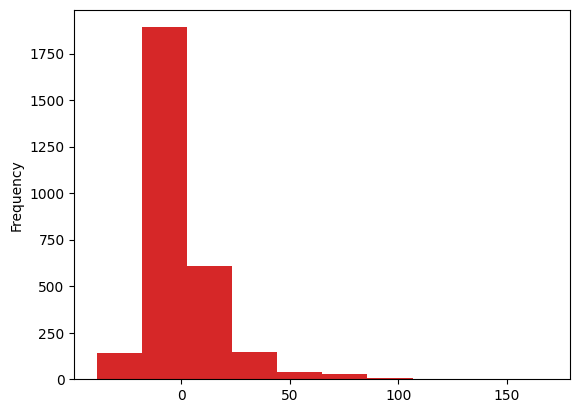

In [47]:
plt.hist((comp2022.actual['ACTUAL_ELAPSED_TIME'] - comp2022.actual['SCHEDULED_ELAPSED_TIME']))
plt.show()

/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 4 rows containing missing values.
/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 3 rows containing missing values.


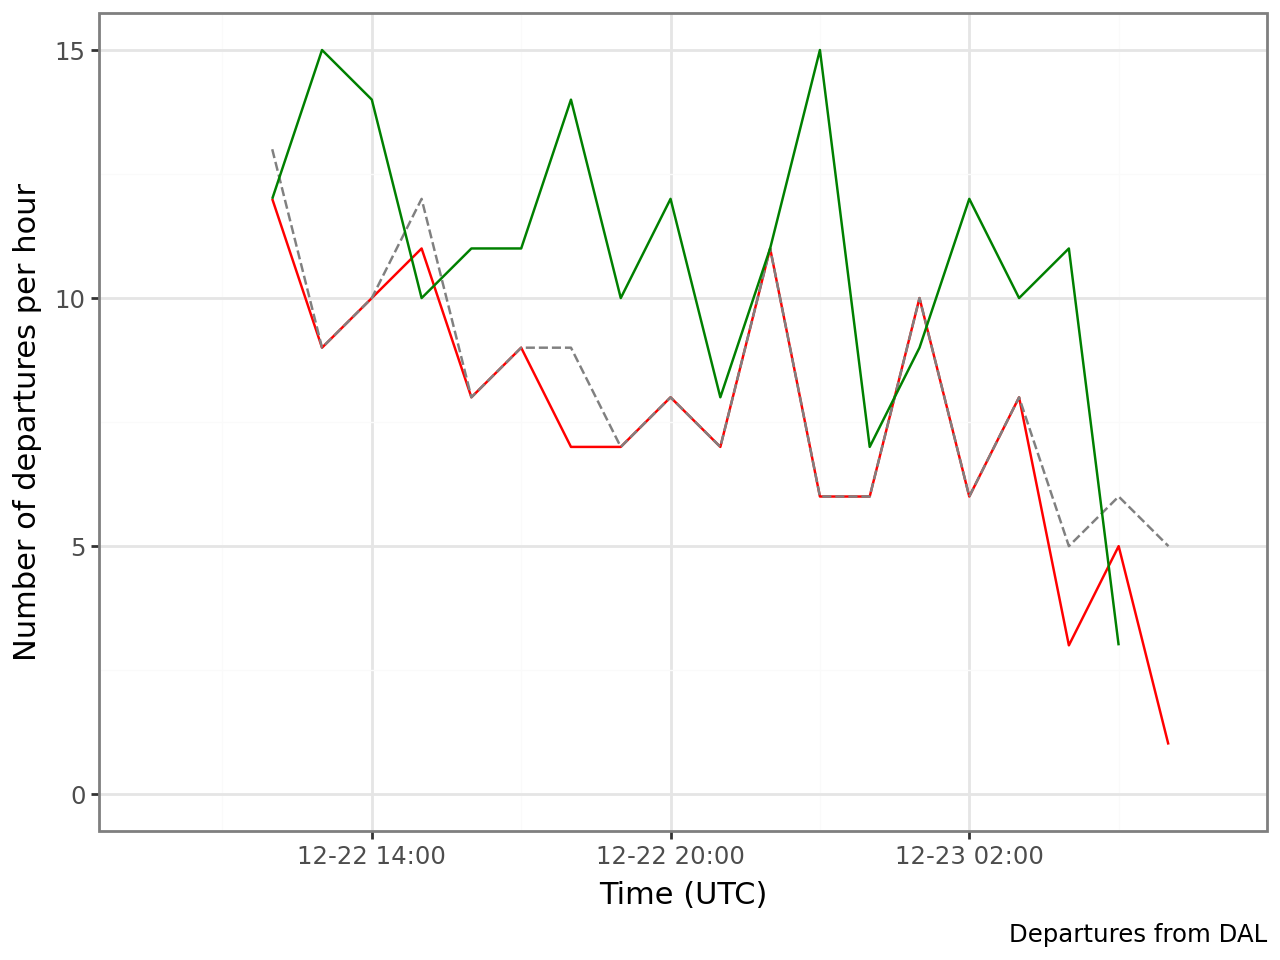

In [13]:
compare_dep_throughput_toggling_disruptions(comp2022.actual, comp2022.simulated, comp2022_nodisrupt.simulated, 'DAL')

In [14]:
for focus in ['DEN', 'HOU', 'MDW', 'MCO']:
    # co.pn.ggsave(compare_arr_throughput(comp, focus), f'plots/2022-nodisrupt-{focus}-arr-throughput.pdf', width=4, height=3)
    co.pn.ggsave(compare_arr_throughput_toggling_disruptions(comp2022.actual, comp2022.simulated, comp2022_nodisrupt.simulated, focus), f'plots/2022-{focus}-arr-throughput.pdf', width=4, height=3)
    co.pn.ggsave(compare_dep_throughput_toggling_disruptions(comp2022.actual, comp2022.simulated, comp2022_nodisrupt.simulated, focus), f'plots/2022-{focus}-dep-throughput.pdf', width=4, height=3)
# for focus in ['DEN', 'MDW', 'DAL', 'SAN', 'DTW']:
#     co.pn.ggsave(compare_arr_throughput(comps_2024[0], focus), f'plots/2024-{focus}-arr-throughput.pdf', width=4, height=3)
# for focus in ['DEN', 'MDW', 'DAL', 'SAN', 'DTW']:
#     co.pn.ggsave(compare_dep_throughput(comps_2022[0], focus), f'plots/2022-{focus}-dep-throughput.pdf', width=4, height=3)
# for focus in ['DEN', 'HOU', 'MDW', 'MCO']:
#     # co.pn.ggsave(compare_dep_throughput(comp, focus), f'plots/2022-nodisrupt-{focus}-dep-throughput.pdf', width=4, height=3)
#     co.pn.ggsave(compare_arr_throughput_toggling_disruptions(comp2024.actual, comp2024.simulated, comp2024_nodisrupt.simulated, focus), f'plots/2024-{focus}-arr-throughput.pdf', width=4, height=3)
#     co.pn.ggsave(compare_dep_throughput_toggling_disruptions(comp2024.actual, comp2024.simulated, comp2024_nodisrupt.simulated, focus), f'plots/2024-{focus}-dep-throughput.pdf', width=4, height=3)

/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 4 x 3 in image.
/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: plots/2022-DEN-arr-throughput.pdf
/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 5 rows containing missing values.
/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor

In [3]:
import timezonefinder as tzf
airport_coords = (
    pd.read_csv("../db/truth/T_MASTER_CORD.csv")
    .set_index("AIRPORT")
    .query("AIRPORT_IS_CLOSED < 1 and AIRPORT_IS_LATEST")[
        ["LATITUDE", "LONGITUDE", "DISPLAY_AIRPORT_NAME"]
    ]
)

def prep_bts(start_date, end_date, filename):
    finder = tzf.TimezoneFinder()
    flights = pd.read_csv(filename)
    flights = flights[flights['OP_UNIQUE_CARRIER'] == 'WN']

    flights["OriginTimezone"] = flights["ORIGIN"].map(
        lambda origin: finder.timezone_at(
            lng=airport_coords.LONGITUDE[origin], lat=airport_coords.LATITUDE[origin]
        )
    )
    flights["DestTimezone"] = flights["DEST"].map(
        lambda origin: finder.timezone_at(
            lng=airport_coords.LONGITUDE[origin], lat=airport_coords.LATITUDE[origin]
        )
    )
    flights["Div1Timezone"] = flights["DIV1_AIRPORT"].map(
        lambda div: None if pd.isna(div) else finder.timezone_at(
            lng=airport_coords.LONGITUDE[div], lat=airport_coords.LATITUDE[div]
        )
    )

    flights["FL_DATE"] = pd.to_datetime(flights["FL_DATE"])
    flights = flights[flights['FL_DATE'].between(start_date, end_date)]

    assert len(flights.index) > 0, 'empty flights dataframe! is the selected date range available in the selected dataset?'

    def dep_time_to_utc(row):
        hour = row["CRS_DEP_TIME"] // 100
        minute = row["CRS_DEP_TIME"] % 100
        date = row["FL_DATE"]
        local_ts = pd.Timestamp(
            year=date.year,
            month=date.month,
            day=date.day,
            hour=hour,
            minute=minute,
            tz=row["OriginTimezone"],
        )
        return local_ts.tz_convert("UTC")

    def arr_time_to_utc(row):
        hour = row["CRS_ARR_TIME"] // 100
        minute = row["CRS_ARR_TIME"] % 100
        # account for overnight flights
        date = row["FL_DATE"] + (pd.Timedelta(seconds=0) if row["CRS_ARR_TIME"] > row["CRS_DEP_TIME"] - 400 else pd.Timedelta(days=1))
        local_ts = pd.Timestamp(
            year=date.year,
            month=date.month,
            day=date.day,
            hour=hour,
            minute=minute,
            tz=row["DestTimezone"],
        )
        return local_ts.tz_convert("UTC")

    flights["ScheduledDepTimeUTC"] = flights.apply(dep_time_to_utc, axis=1)
    flights["ScheduledDepDateUTC"] = flights["ScheduledDepTimeUTC"].dt.date
    flights["ScheduledDepHourUTC"] = flights["ScheduledDepTimeUTC"].dt.hour
    flights["ScheduledDepTimePacific"] = flights["ScheduledDepTimeUTC"].dt.tz_convert(
        "America/Los_Angeles"
    )
    flights["ScheduledDepDatePacific"] = flights["ScheduledDepTimePacific"].dt.date
    flights["ScheduledDepHourPacific"] = flights["ScheduledDepTimePacific"].dt.hour
    flights["ScheduledArrTimeUTC"] = flights.apply(arr_time_to_utc, axis=1)
    flights["ScheduledArrDateUTC"] = flights["ScheduledArrTimeUTC"].dt.date
    flights["ScheduledArrHourUTC"] = flights["ScheduledArrTimeUTC"].dt.hour
    flights["ScheduledArrTimePacific"] = flights["ScheduledArrTimeUTC"].dt.tz_convert(
        "America/Los_Angeles"
    )
    flights["ScheduledArrDatePacific"] = flights["ScheduledArrTimePacific"].dt.date
    flights["ScheduledArrHourPacific"] = flights["ScheduledArrTimePacific"].dt.hour

    def get_actual_dep_time(row):
        if pd.isna(row['DEP_DELAY']):
            return pd.NA
        return row['ScheduledDepTimeUTC'] + pd.Timedelta(minutes=row['DEP_DELAY'])
    
    def get_actual_arr_time(row):
        if pd.isna(row['ARR_DELAY']):
            return pd.NA
        return row['ScheduledArrTimeUTC'] + pd.Timedelta(minutes=row['ARR_DELAY'])

    def get_optional_hour(row):
        if pd.isna(row):
            return pd.NA
        return row.hour
    
    flights['ActualDepTimeUTC'] = flights.apply(get_actual_dep_time, axis=1)
    flights['ActualArrTimeUTC'] = flights.apply(get_actual_arr_time, axis=1)

    flights['ActualDepHourUTC'] = flights['ActualDepTimeUTC'].apply(get_optional_hour)
    flights['ActualArrHourUTC'] = flights['ActualArrTimeUTC'].apply(get_optional_hour)

    return flights
real_df = prep_bts('2024-01-28', '2024-01-28', '../db/truth/T_ONTIME_REPORTING_2024.csv')
real_df.reset_index(names='id', inplace=True)
real_df

/var/folders/m6/jbwjsxrx6ss_63r93c4r01980000gn/T/ipykernel_88164/2918991510.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


,id,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,ScheduledArrTimeUTC,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,ActualDepHourUTC,ActualArrHourUTC
0,491135,2024-01-28,WN,N1801U,1722,PHX,STL,1900,1917.0,17.0,...,2024-01-29 04:50:00+00:00,2024-01-29,4,2024-01-28 20:50:00-08:00,2024-01-28,20,2024-01-29 02:17:00+00:00,2024-01-29 05:03:00+00:00,2,5
1,491136,2024-01-28,WN,N1801U,2037,MDW,PHX,1515,1552.0,37.0,...,2024-01-29 01:15:00+00:00,2024-01-29,1,2024-01-28 17:15:00-08:00,2024-01-28,17,2024-01-28 21:52:00+00:00,2024-01-29 01:21:00+00:00,21,1
2,491137,2024-01-28,WN,N1801U,2837,LAS,MDW,900,928.0,28.0,...,2024-01-28 20:30:00+00:00,2024-01-28,20,2024-01-28 12:30:00-08:00,2024-01-28,12,2024-01-28 17:28:00+00:00,2024-01-28 20:55:00+00:00,17,20
3,491138,2024-01-28,WN,N1802U,1133,ITO,HNL,845,837.0,-8.0,...,2024-01-28 19:40:00+00:00,2024-01-28,19,2024-01-28 11:40:00-08:00,2024-01-28,11,2024-01-28 18:37:00+00:00,2024-01-28 19:31:00+00:00,18,19
4,491139,2024-01-28,WN,N1802U,1567,ITO,HNL,1215,1204.0,-11.0,...,2024-01-28 23:15:00+00:00,2024-01-28,23,2024-01-28 15:15:00-08:00,2024-01-28,15,2024-01-28 22:04:00+00:00,2024-01-28 23:04:00+00:00,22,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,495071,2024-01-28,WN,N969WN,1247,DAL,LAX,600,555.0,-5.0,...,2024-01-28 15:25:00+00:00,2024-01-28,15,2024-01-28 07:25:00-08:00,2024-01-28,7,2024-01-28 11:55:00+00:00,2024-01-28 15:19:00+00:00,11,15
3937,495072,2024-01-28,WN,N969WN,1247,LAX,SFO,800,759.0,-1.0,...,2024-01-28 17:25:00+00:00,2024-01-28,17,2024-01-28 09:25:00-08:00,2024-01-28,9,2024-01-28 15:59:00+00:00,2024-01-28 17:27:00+00:00,15,17
3938,495073,2024-01-28,WN,N969WN,1247,SFO,DEN,1000,1007.0,7.0,...,2024-01-28 20:25:00+00:00,2024-01-28,20,2024-01-28 12:25:00-08:00,2024-01-28,12,2024-01-28 18:07:00+00:00,2024-01-28 20:27:00+00:00,18,20
3939,495074,2024-01-28,WN,N969WN,562,DEN,IAD,1410,1437.0,27.0,...,2024-01-29 00:15:00+00:00,2024-01-29,0,2024-01-28 16:15:00-08:00,2024-01-28,16,2024-01-28 21:37:00+00:00,2024-01-29 00:44:00+00:00,21,0


In [4]:
sim_df['arr_time'] = pd.to_datetime(sim_df['arr_time'], utc=True)
sim_df['sched_arr'] = pd.to_datetime(sim_df['sched_arr'], utc=True)
sim_df['sched_dep'] = pd.to_datetime(sim_df['sched_dep'], utc=True)
sim_df['dep_time'] = pd.to_datetime(sim_df['dep_time'], utc=True)
sim_df['DEP_DELAY'] = (sim_df['dep_time'] - sim_df['sched_dep']).dt.total_seconds() // 60

In [5]:
oc = co.OutcomeComparison(real_df, sim_df)

In [6]:
sim_df['dep_hour'] = sim_df['dep_time'].dt.hour
# real_df['DepHourOrd'] = (real_df['ActualDepTimeUTC'] - real_df['ScheduledDepTimeUTC'].min()).dt.total_seconds() // 3600

<Axes: xlabel='ActualDepHourUTC'>

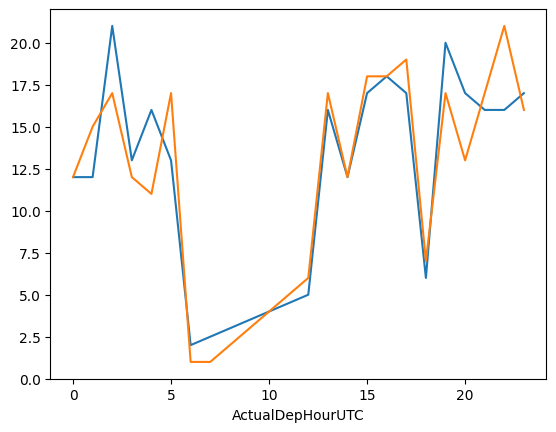

In [9]:
sim_df[sim_df['origin'] == 'DEN'].groupby('dep_hour')['origin'].count().plot.line()
real_df[real_df['ORIGIN'] == 'DEN'].groupby('ActualDepHourUTC')['ORIGIN'].count().plot.line()

<Axes: xlabel='ActualDepHourUTC'>

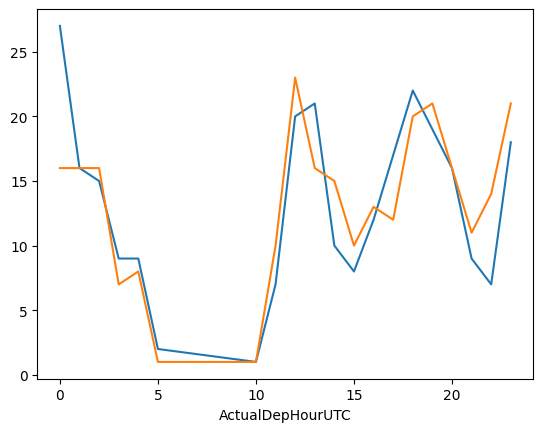

In [10]:
sim_df[sim_df['dest'] == 'DEN'].groupby('dep_hour')['origin'].count().plot.line()
real_df[real_df['DEST'] == 'DEN'].groupby('ActualDepHourUTC')['ORIGIN'].count().plot.line()

/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 14 rows containing missing values.


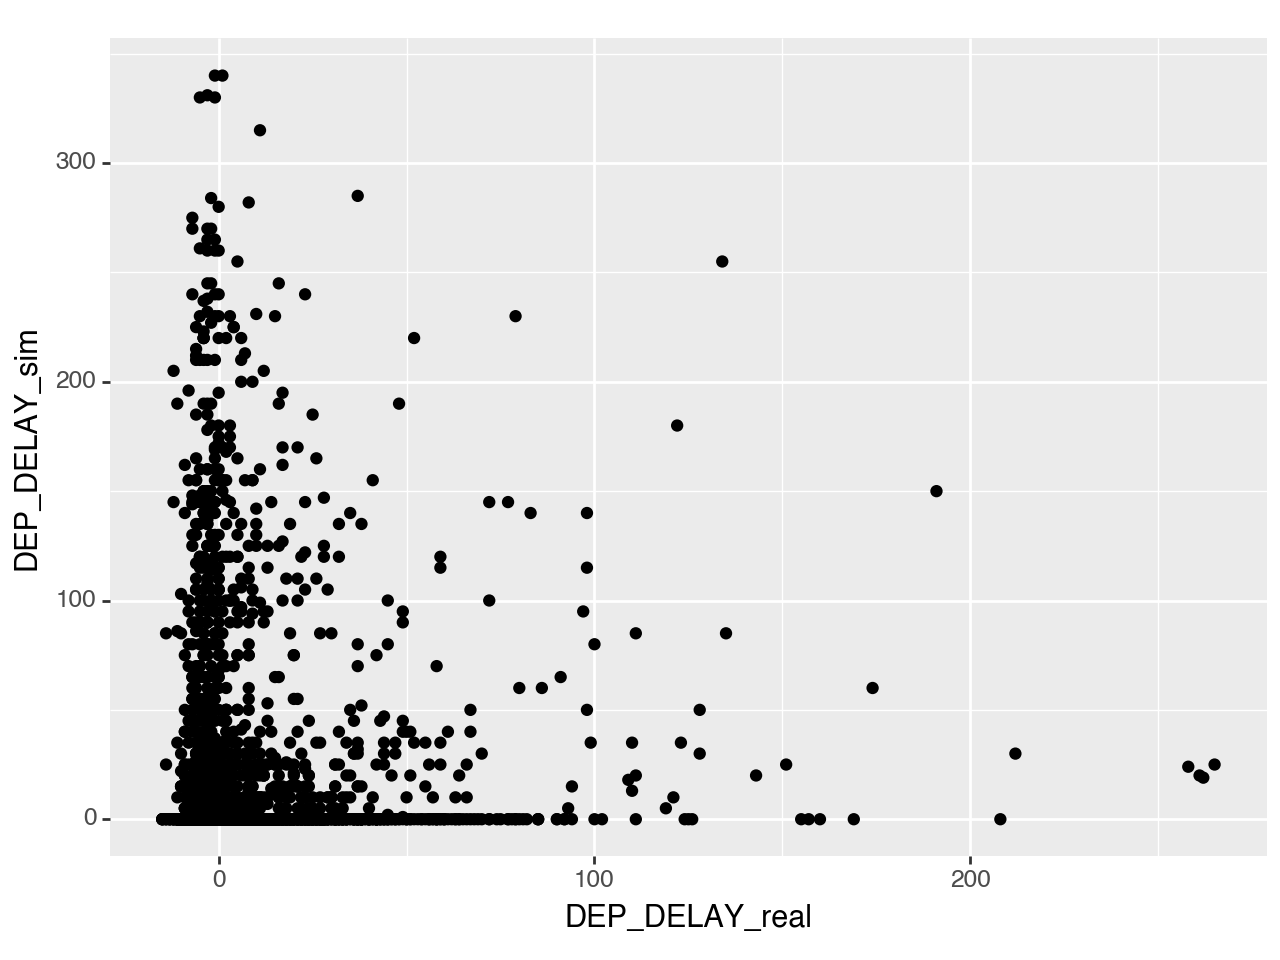

<Figure Size: (640 x 480)>

In [11]:
co.pn.ggplot(pd.merge(real_df, sim_df, on='id', suffixes=['_real', '_sim'])) + co.pn.geom_point(co.pn.aes(x='DEP_DELAY_real', y='DEP_DELAY_sim'))

<Axes: >

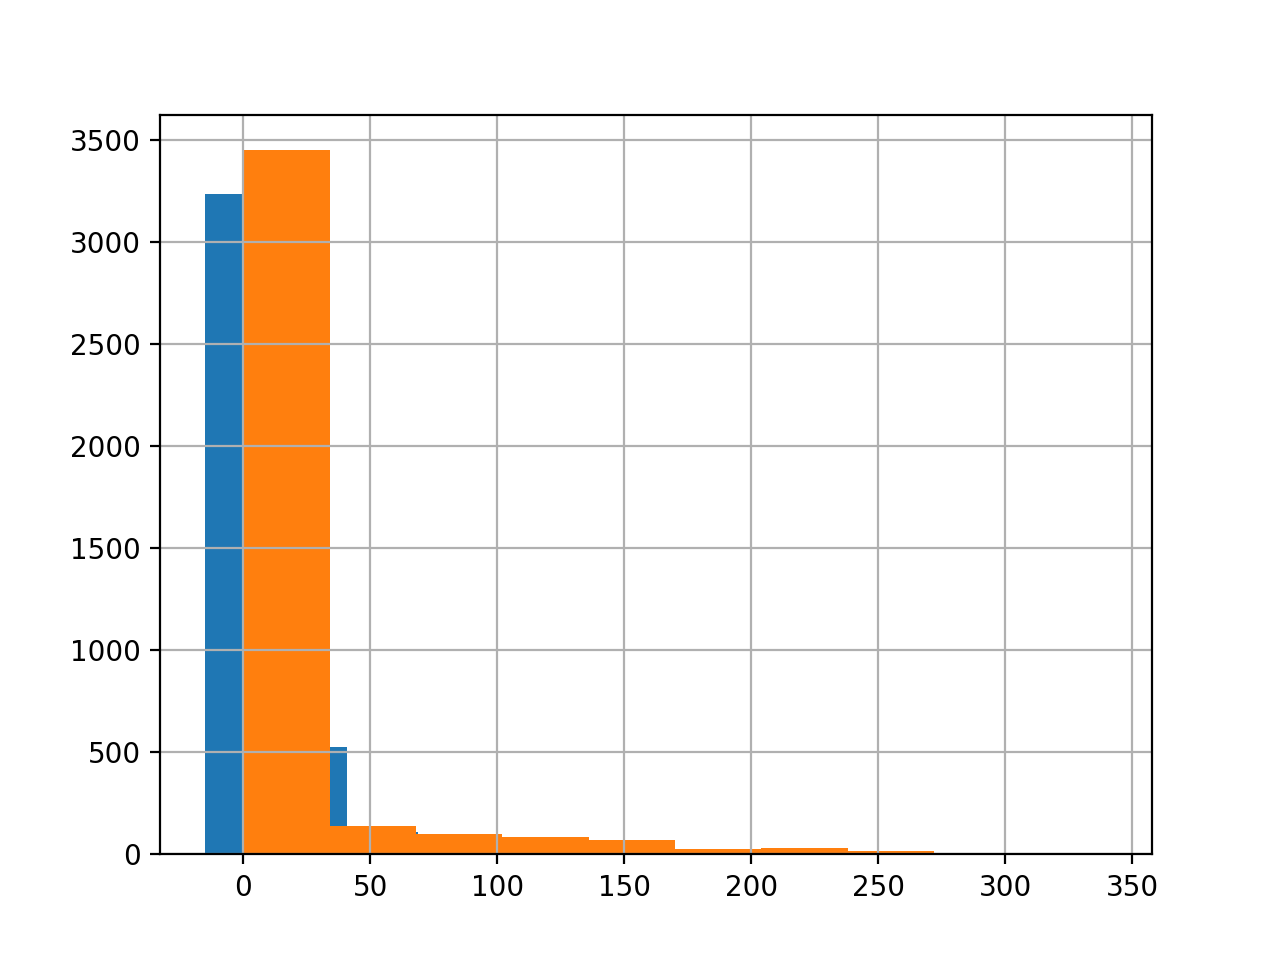

In [12]:
real_df['DEP_DELAY'].hist()
sim_df['DEP_DELAY'].hist()

In [13]:
oc.compare_otp()

{'actual': 0.8657701091093631, 'sim': 0.8102004567368688}

In [15]:
(oc.actual['DEP_DELAY'].sum(),
 oc.simulated['DEP_DELAY'].sum())

(21528.0, 62473.0)

In [8]:
all_df = pd.merge(sim_df, real_df, left_on='id', right_on='flight_id', suffixes=['sim', 'real'])
all_df

,id,flight_number,tail,crew,passengers,origin,dest,cancelled,dep_time,arr_time,...,ScheduledDepDatePacific,ScheduledDepHourPacific,ScheduledArrTimeUTC,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC
0,492728,1560,N791SW,837.0,143,SNA,SMF,0,2024-01-28 15:45:00,2024-01-28 17:30:00,...,2024-01-28,7,2024-01-28 17:30:00+00:00,2024-01-28,17,2024-01-28 09:30:00-08:00,2024-01-28,9,2024-01-28 15:42:00+00:00,2024-01-28 17:14:00+00:00
1,492003,1592,N473WN,701.0,143,SMF,LAX,0,2024-01-28 17:10:00,2024-01-28 18:40:00,...,2024-01-28,9,2024-01-28 18:40:00+00:00,2024-01-28,18,2024-01-28 10:40:00-08:00,2024-01-28,10,2024-01-28 17:24:00+00:00,2024-01-28 18:40:00+00:00
2,492310,1623,N7732A,6.0,0,SJC,SAN,0,2024-01-29 01:40:00,2024-01-29 03:05:00,...,2024-01-28,17,2024-01-29 03:05:00+00:00,2024-01-29,3,2024-01-28 19:05:00-08:00,2024-01-28,19,2024-01-29 01:38:00+00:00,2024-01-29 03:09:00+00:00
3,492572,2015,N7859B,94.0,126,LAS,TUS,0,2024-01-28 23:25:00,2024-01-29 00:45:00,...,2024-01-28,15,2024-01-29 00:45:00+00:00,2024-01-29,0,2024-01-28 16:45:00-08:00,2024-01-28,16,2024-01-28 23:25:00+00:00,2024-01-29 00:34:00+00:00
4,492826,262,N8323C,201.0,144,MCO,IND,0,2024-01-28 22:30:00,2024-01-29 01:00:00,...,2024-01-28,14,2024-01-29 01:00:00+00:00,2024-01-29,1,2024-01-28 17:00:00-08:00,2024-01-28,17,2024-01-28 22:38:00+00:00,2024-01-29 01:28:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,492434,1469,N7822A,631.0,0,MDW,MEM,0,2024-01-28 22:35:00,2024-01-29 00:25:00,...,2024-01-28,14,2024-01-29 00:25:00+00:00,2024-01-29,0,2024-01-28 16:25:00-08:00,2024-01-28,16,2024-01-28 22:35:00+00:00,2024-01-29 00:03:00+00:00
3937,492737,574,N793SA,427.0,0,DEN,BUR,0,2024-01-29 03:20:00,2024-01-29 05:55:00,...,2024-01-28,19,2024-01-29 05:55:00+00:00,2024-01-29,5,2024-01-28 21:55:00-08:00,2024-01-28,21,2024-01-29 03:20:00+00:00,2024-01-29 05:40:00+00:00
3938,494615,1776,N8893L,1370.0,175,MCO,MDW,0,2024-01-28 16:15:00,2024-01-28 19:10:00,...,2024-01-28,8,2024-01-28 19:10:00+00:00,2024-01-28,19,2024-01-28 11:10:00-08:00,2024-01-28,11,2024-01-28 16:20:00+00:00,2024-01-28 18:56:00+00:00
3939,492530,1290,N7849A,399.0,143,LAX,DEN,0,2024-01-28 20:10:00,2024-01-28 22:30:00,...,2024-01-28,12,2024-01-28 22:30:00+00:00,2024-01-28,22,2024-01-28 14:30:00-08:00,2024-01-28,14,2024-01-28 20:07:00+00:00,2024-01-28 22:15:00+00:00


In [9]:
for key in ['dep_time', 'arr_time', 'sched_dep', 'sched_arr']:
    all_df[key] = pd.to_datetime(all_df[key], utc=True)

In [10]:
all_df['sched_dep']

0      2024-01-28 15:45:00+00:00
1      2024-01-28 17:10:00+00:00
2      2024-01-29 01:40:00+00:00
3      2024-01-28 23:25:00+00:00
4      2024-01-28 22:30:00+00:00
                  ...           
3936   2024-01-28 22:35:00+00:00
3937   2024-01-29 03:20:00+00:00
3938   2024-01-28 16:15:00+00:00
3939   2024-01-28 20:10:00+00:00
3940   2024-01-28 12:25:00+00:00
Name: sched_dep, Length: 3941, dtype: datetime64[ns, UTC]

In [11]:
all_df['sim_dep_delay'] = (all_df['dep_time'] - all_df['sched_dep']).dt.total_seconds() / 60

In [12]:
all_df['sim_dep_delay'].sum()

3410.0

In [13]:
all_df['DEP_DELAY'].sum()

21528.0

In [14]:
all_df.columns

Index(['id', 'flight_number', 'tail', 'crew', 'passengers', 'origin', 'dest',
       'cancelled', 'dep_time', 'arr_time', 'sched_dep', 'sched_arr',
       'flight_id', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DIV1_AIRPORT',
       'DIV1_WHEELS_ON', 'OriginTimezone', 'DestTimezone', 'Div1Timezone',
       'ScheduledDepTimeUTC', 'ScheduledDepDateUTC', 'ScheduledDepHourUTC',
       'ScheduledDepTimePacific', 'ScheduledDepDatePacific',
       'ScheduledDepHourPacific', 'ScheduledArrTimeUTC', 'ScheduledArrDateUTC',
       'ScheduledArrHourUTC', 'ScheduledArrTimePacific',
       'ScheduledArrDatePacific', 'ScheduledArrHourPacific',
       'ActualDepTimeUTC'

In [15]:
all_df[(all_df['sim_dep_delay'] - all_df['DEP_DELAY']).abs() > 30]\
    [['id', 'flight_number', 'tail', 'origin', 'dest', 'sched_dep', 'dep_time', 'ActualDepTimeUTC', 'sim_dep_delay', 'DEP_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]\
    .sort_values('DEP_DELAY')

,id,flight_number,tail,origin,dest,sched_dep,dep_time,ActualDepTimeUTC,sim_dep_delay,DEP_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
3171,493562,1414,N8668A,AMA,DAL,2024-01-29 01:35:00+00:00,2024-01-29 06:05:00+00:00,2024-01-29 01:26:00+00:00,270.0,-9.0,NaN,NaN,NaN,NaN,NaN
1927,491480,2244,N259WN,CHS,BNA,2024-01-29 01:10:00+00:00,2024-01-29 01:45:00+00:00,2024-01-29 01:03:00+00:00,35.0,-7.0,NaN,NaN,NaN,NaN,NaN
2307,492422,1246,N7819A,BWI,DEN,2024-01-29 01:55:00+00:00,2024-01-29 03:45:00+00:00,2024-01-29 01:50:00+00:00,110.0,-5.0,NaN,NaN,NaN,NaN,NaN
482,491521,2880,N266WN,STL,PHX,2024-01-28 17:10:00+00:00,2024-01-28 17:45:00+00:00,2024-01-28 17:05:00+00:00,35.0,-5.0,NaN,NaN,NaN,NaN,NaN
2696,494377,3814,N8849Q,MDW,DEN,2024-01-29 01:25:00+00:00,2024-01-29 03:20:00+00:00,2024-01-29 01:20:00+00:00,115.0,-5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,492348,2921,N773SA,TPA,ATL,2024-01-28 19:15:00+00:00,2024-01-28 19:15:00+00:00,2024-01-28 22:47:00+00:00,0.0,212.0,11.0,0.0,0.0,0.0,193.0
1385,492261,2683,N7715E,PHX,BUF,2024-01-28 18:00:00+00:00,2024-01-28 18:15:00+00:00,2024-01-28 22:18:00+00:00,15.0,258.0,258.0,0.0,5.0,0.0,0.0
372,494770,1666,N7833A,RSW,IND,2024-01-29 00:55:00+00:00,2024-01-29 00:55:00+00:00,2024-01-29 05:16:00+00:00,0.0,261.0,0.0,0.0,0.0,0.0,260.0
289,492260,2683,N7715E,BUF,FLL,2024-01-28 22:35:00+00:00,2024-01-28 22:45:00+00:00,2024-01-29 02:57:00+00:00,10.0,262.0,0.0,0.0,0.0,0.0,254.0


## Case Study: `N7715E`

- Actual path: DEN -> PHX -> BUF -> FLL
- Simulated path: PHX -> BUF -> FLL
  - DEN -> PHX was executed by `N564WN` instead from 1930Z to 2130Z on 01-28 (SWA1764)
  - `N564WN` actually flew from `LIR` (Liberia, Costa Rica) into Denver and arrived at around 1925Z
  - Case in point: Lack of international flights at the source contributes to discrepancies in schedule execution

In [16]:
all_df.query('tail != TAIL_NUM').shape

(55, 56)

55 out of 3941 flights were executed with a different aircraft than the actual planned aircraft in the simulation.

In [17]:
all_df.query('flight_number == 1764')

,id,flight_number,tail,crew,passengers,origin,dest,cancelled,dep_time,arr_time,...,ScheduledDepHourPacific,ScheduledArrTimeUTC,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,sim_dep_delay
1009,492259,1764,N564WN,252.0,175,DEN,PHX,0,2024-01-28 19:30:00+00:00,2024-01-28 21:30:00+00:00,...,11,2024-01-28 21:30:00+00:00,2024-01-28,21,2024-01-28 13:30:00-08:00,2024-01-28,13,2024-01-28 19:31:00+00:00,2024-01-28 21:18:00+00:00,0.0
3894,491246,1764,N211WN,28.0,143,PHX,SJC,0,2024-01-28 22:55:00+00:00,2024-01-29 00:50:00+00:00,...,14,2024-01-29 00:05:00+00:00,2024-01-29,0,2024-01-28 16:05:00-08:00,2024-01-28,16,2024-01-28 22:59:00+00:00,2024-01-29 00:40:00+00:00,45.0


In [18]:
all_df.query('tail == "N7819A"').sort_values('ScheduledDepTimeUTC')[['id', 'flight_number', 'tail', 'origin', 'dest', 'sched_dep', 'dep_time', 'ActualDepTimeUTC', 'arr_time', 'ActualArrTimeUTC', 'sim_dep_delay', 'DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'TAIL_NUM']]

,id,flight_number,tail,origin,dest,sched_dep,dep_time,ActualDepTimeUTC,arr_time,ActualArrTimeUTC,sim_dep_delay,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TAIL_NUM
1472,492421,1197,N7819A,TPA,HOU,2024-01-28 11:30:00+00:00,2024-01-28 11:30:00+00:00,2024-01-28 11:26:00+00:00,2024-01-28 13:55:00+00:00,2024-01-28 13:44:00+00:00,0.0,-4.0,-11.0,NaN,NaN,NaN,NaN,NaN,N7819A
1011,492564,3461,N7819A,HOU,BWI,2024-01-29 00:25:00+00:00,2024-01-29 00:25:00+00:00,2024-01-29 00:29:00+00:00,2024-01-29 03:10:00+00:00,2024-01-29 03:18:00+00:00,0.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,N7857B
2307,492422,1246,N7819A,BWI,DEN,2024-01-29 01:55:00+00:00,2024-01-29 03:45:00+00:00,2024-01-29 01:50:00+00:00,2024-01-29 08:05:00+00:00,2024-01-29 05:45:00+00:00,110.0,-5.0,-30.0,NaN,NaN,NaN,NaN,NaN,N7819A


In [19]:
all_df.query('TAIL_NUM == "N7819A"').sort_values('ScheduledDepTimeUTC')[['id', 'flight_number', 'tail', 'origin', 'dest', 'sched_dep', 'dep_time', 'ActualDepTimeUTC', 'arr_time', 'ActualArrTimeUTC', 'sim_dep_delay', 'DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'TAIL_NUM']]

,id,flight_number,tail,origin,dest,sched_dep,dep_time,ActualDepTimeUTC,arr_time,ActualArrTimeUTC,sim_dep_delay,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TAIL_NUM
1472,492421,1197,N7819A,TPA,HOU,2024-01-28 11:30:00+00:00,2024-01-28 11:30:00+00:00,2024-01-28 11:26:00+00:00,2024-01-28 13:55:00+00:00,2024-01-28 13:44:00+00:00,0.0,-4.0,-11.0,NaN,NaN,NaN,NaN,NaN,N7819A
2307,492422,1246,N7819A,BWI,DEN,2024-01-29 01:55:00+00:00,2024-01-29 03:45:00+00:00,2024-01-29 01:50:00+00:00,2024-01-29 08:05:00+00:00,2024-01-29 05:45:00+00:00,110.0,-5.0,-30.0,NaN,NaN,NaN,NaN,NaN,N7819A


In [20]:
all_df.query('tail == "N7857B"').sort_values('ScheduledDepTimeUTC')[['id', 'flight_number', 'tail', 'origin', 'dest', 'sched_dep', 'dep_time', 'ActualDepTimeUTC', 'arr_time', 'ActualArrTimeUTC', 'sim_dep_delay', 'DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'TAIL_NUM']]

,id,flight_number,tail,origin,dest,sched_dep,dep_time,ActualDepTimeUTC,arr_time,ActualArrTimeUTC,sim_dep_delay,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TAIL_NUM
2390,492563,102,N7857B,ELP,DEN,2024-01-28 13:15:00+00:00,2024-01-28 13:15:00+00:00,2024-01-28 13:14:00+00:00,2024-01-28 15:10:00+00:00,2024-01-28 14:57:00+00:00,0.0,-1.0,-13.0,NaN,NaN,NaN,NaN,NaN,N7857B
466,491294,3235,N7857B,DEN,PIT,2024-01-29 01:30:00+00:00,2024-01-29 01:30:00+00:00,2024-01-29 01:49:00+00:00,2024-01-29 04:20:00+00:00,2024-01-29 04:57:00+00:00,0.0,19.0,37.0,19.0,0.0,18.0,0.0,0.0,N221WN


In [21]:
all_df.query('TAIL_NUM == "N7857B"').sort_values('ScheduledDepTimeUTC')[['id', 'flight_number', 'tail', 'origin', 'dest', 'sched_dep', 'dep_time', 'ActualDepTimeUTC', 'arr_time', 'ActualArrTimeUTC', 'sim_dep_delay', 'DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'TAIL_NUM']]

,id,flight_number,tail,origin,dest,sched_dep,dep_time,ActualDepTimeUTC,arr_time,ActualArrTimeUTC,sim_dep_delay,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TAIL_NUM
2390,492563,102,N7857B,ELP,DEN,2024-01-28 13:15:00+00:00,2024-01-28 13:15:00+00:00,2024-01-28 13:14:00+00:00,2024-01-28 15:10:00+00:00,2024-01-28 14:57:00+00:00,0.0,-1.0,-13.0,NaN,NaN,NaN,NaN,NaN,N7857B
1011,492564,3461,N7819A,HOU,BWI,2024-01-29 00:25:00+00:00,2024-01-29 00:25:00+00:00,2024-01-29 00:29:00+00:00,2024-01-29 03:10:00+00:00,2024-01-29 03:18:00+00:00,0.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,N7857B


## Case study: `N7819A` and `492422`

Causal chain:
- `491295` (SWA3851, MTJ-DEN, N221WN) cancelled due to **crew shortage**
- `491294` (SWA3235, DEN-PIT, N221WN) executed with N7857B instead in the simulation (consumed N7857B because N221WN was cancelled)
- **N7819A actually executed HOU-LIR, LIR-BWI; escaped dataset for being overseas**
- **N7857B actually executed DEN-PVR, PVR-HOU; escaped dataset for being overseas**
- `492564` (SWA3461, HOU-BWI, N7857B) executed with N7819A instead in the simulation (consumed N7819A because N7857B was consumed)
- `492422` (SWA1246, BWI-DEN, N7819A) got delayed because N7819A arrived late from HOU

<Axes: >

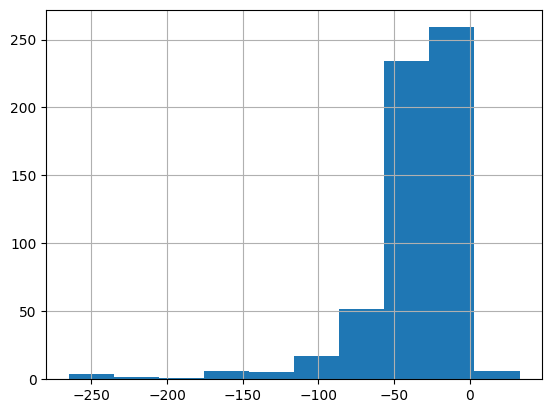

In [22]:
delayed_df = all_df[all_df.DEP_DELAY > 15]
((delayed_df['sim_dep_delay'] - delayed_df['DEP_DELAY'])).hist()

In [24]:
delayed_df = delayed_df.copy()
delayed_df['sim_minus_irl'] = delayed_df['sim_dep_delay'] - delayed_df['DEP_DELAY']

In [27]:
delayed_df[delayed_df['sim_minus_irl'] < -30]

,id,flight_number,tail,crew,passengers,origin,dest,cancelled,dep_time,arr_time,...,ScheduledArrTimeUTC,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,sim_dep_delay,sim_minus_irl
12,494152,1281,N8806Q,407.0,1,AUS,FLL,0,2024-01-29 01:25:00+00:00,2024-01-29 03:55:00+00:00,...,2024-01-29 03:55:00+00:00,2024-01-29,3,2024-01-28 19:55:00-08:00,2024-01-28,19,2024-01-29 02:14:00+00:00,2024-01-29 04:40:00+00:00,0.0,-49.0
17,491390,1898,N241WN,773.0,132,DCA,BNA,0,2024-01-28 17:25:00+00:00,2024-01-28 19:30:00+00:00,...,2024-01-28 18:40:00+00:00,2024-01-28,18,2024-01-28 10:40:00-08:00,2024-01-28,10,2024-01-28 18:43:00+00:00,2024-01-28 20:16:00+00:00,50.0,-78.0
30,491169,824,N1808U,159.0,0,LAS,LGB,0,2024-01-29 01:15:00+00:00,2024-01-29 02:25:00+00:00,...,2024-01-29 02:25:00+00:00,2024-01-29,2,2024-01-28 18:25:00-08:00,2024-01-28,18,2024-01-29 02:55:00+00:00,2024-01-29 03:53:00+00:00,0.0,-100.0
42,493429,3080,N8639B,969.0,26,TPA,PHX,0,2024-01-28 23:55:00+00:00,2024-01-29 04:40:00+00:00,...,2024-01-29 04:40:00+00:00,2024-01-29,4,2024-01-28 20:40:00-08:00,2024-01-28,20,2024-01-29 00:50:00+00:00,2024-01-29 05:17:00+00:00,0.0,-55.0
62,494276,2413,N8830Q,148.0,0,MIA,MSY,0,2024-01-28 23:45:00+00:00,2024-01-29 01:55:00+00:00,...,2024-01-29 01:00:00+00:00,2024-01-29,1,2024-01-28 17:00:00-08:00,2024-01-28,17,2024-01-29 00:54:00+00:00,2024-01-29 03:15:00+00:00,55.0,-69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840,494740,2727,N902WN,1231.0,143,BWI,MIA,0,2024-01-28 19:15:00+00:00,2024-01-28 21:55:00+00:00,...,2024-01-28 21:55:00+00:00,2024-01-28,21,2024-01-28 13:55:00-08:00,2024-01-28,13,2024-01-28 19:47:00+00:00,2024-01-28 22:46:00+00:00,0.0,-32.0
3845,492258,1076,N7713A,1289.0,0,PHX,HOU,0,2024-01-29 02:00:00+00:00,2024-01-29 04:20:00+00:00,...,2024-01-29 04:20:00+00:00,2024-01-29,4,2024-01-28 20:20:00-08:00,2024-01-28,20,2024-01-29 03:23:00+00:00,2024-01-29 05:41:00+00:00,0.0,-83.0
3862,494462,3638,N8863Q,906.0,56,OAK,BOI,0,2024-01-29 03:50:00+00:00,2024-01-29 05:25:00+00:00,...,2024-01-29 05:25:00+00:00,2024-01-29,5,2024-01-28 21:25:00-08:00,2024-01-28,21,2024-01-29 04:49:00+00:00,2024-01-29 06:19:00+00:00,0.0,-59.0
3871,491393,3023,N241WN,685.0,0,OAK,BUR,0,2024-01-29 03:05:00+00:00,2024-01-29 04:15:00+00:00,...,2024-01-29 04:10:00+00:00,2024-01-29,4,2024-01-28 20:10:00-08:00,2024-01-28,20,2024-01-29 03:59:00+00:00,2024-01-29 05:03:00+00:00,5.0,-54.0


273 out of 3941 flights (about 7%) had an eventual simulated departure delay that was different from the actual departure delay by more than 30 minutes.

In [35]:
((all_df['dep_time'] - all_df['ActualDepTimeUTC']).dt.total_seconds() / 60).describe()

count    3939.000000
mean       -4.599137
std        20.038587
min      -265.000000
25%        -7.000000
50%         1.000000
75%         5.000000
max       120.000000
dtype: float64